# <font color='red'> Uber Assignment

### **Problem Statement**
- You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?
- Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. Let’s hear more about such problems that Uber faces during its operations.
- As an analyst, you decide to address the problem Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue. 

In [142]:
## import required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [143]:
## import dataset make into dataframe
inp = pd.read_csv('Uber Request Data.csv')
inp.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [144]:
## check the shape dataframe how many rows and columns in the given dataset
inp.shape

(6745, 6)

In [145]:
## check the datatypes in the dataframe
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [146]:
## time consumptions convert high case into low case columns
inp.columns = [x.lower() for x in inp.columns]
inp.columns

Index(['request id', 'pickup point', 'driver id', 'status',
       'request timestamp', 'drop timestamp'],
      dtype='object')

In [147]:
## given columns there is certain spaces just replace with underscore
inp.columns = inp.columns.str.replace(' ','_')
inp.columns

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'drop_timestamp'],
      dtype='object')

In [148]:
## check duplicates in the request_id 
sum(inp.duplicated(subset='request_id'))==0

True

In [149]:
## total value counts in the pickup_point
inp['pickup_point'].value_counts()

City       3507
Airport    3238
Name: pickup_point, dtype: int64

In [150]:
## total value counts in the status columns
inp['status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: status, dtype: int64

In [151]:
## check the missing values in the dataframe
print(inp.isnull().sum())
print('------'*40)
### total missing values in the dataframe
sum(inp.isnull().sum())

request_id              0
pickup_point            0
driver_id            2650
status                  0
request_timestamp       0
drop_timestamp       3914
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


6564

In [152]:
### convert the request_time and drop_time in object into datetime
inp['request_time'] = pd.to_datetime(inp['request_timestamp'])
inp['drop_time'] = pd.to_datetime(inp['drop_timestamp'])
## after converting drop the columns 
inp.drop(['request_timestamp','drop_timestamp'],axis=1, inplace=True)
inp.head()

,request_id,pickup_point,driver_id,status,request_time,drop_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [153]:
## extracting the request_time into hour and day
inp['request_hr'] = inp['request_time'].dt.hour
inp['request_day'] = inp['request_time'].dt.day
inp.head()

,request_id,pickup_point,driver_id,status,request_time,drop_time,request_hr,request_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


<AxesSubplot:xlabel='request_day', ylabel='count'>

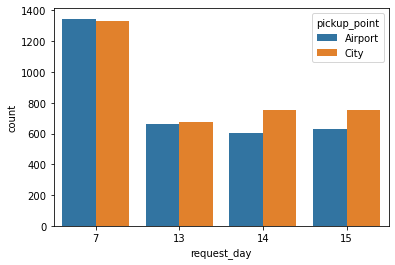

In [154]:
## plot the request day from the pickup point
sns.countplot(data=inp, x='request_day', hue='pickup_point')

<AxesSubplot:xlabel='request_hr', ylabel='count'>

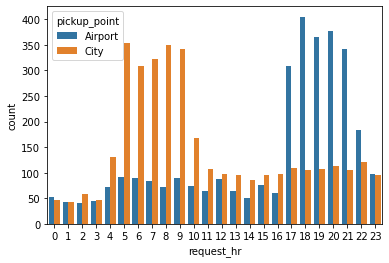

In [155]:
## plot the request_hr from the pickup point
sns.countplot(data=inp, x='request_hr', hue='pickup_point')

In [156]:
## converting request_hrs into time_of_day request timeslot 
def timeslot(x):
    if x < 5:
        return('early morning')
    elif 5 < x < 10:
        return('morning rush')
    elif 10 < x < 14:
        return('afternoon')
    elif 14 < x < 17:
        return('evening')
    elif 17 < x < 22:
        return('night')
    else:
        return('mid night')
inp['time_slot'] = inp['request_hr'].apply(lambda x: timeslot(x))
inp['time_slot'].value_counts()

night            1924
mid night        1740
morning rush     1658
early morning     578
afternoon         515
evening           330
Name: time_slot, dtype: int64

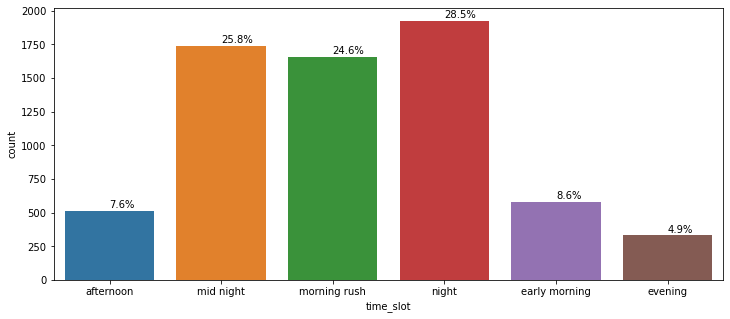

In [157]:
## plot time_of_day into percentage
plt.figure(figsize=(12,5))
total = len(inp)
ax = sns.countplot(data=inp, x='time_slot')
for p in ax.patches:
    percentage = '{:.1f}%'.format(round(100*(p.get_height()/total),2))
    x = p.get_x()+0.4
    y = p.get_height()+25
    ax.annotate(percentage, (x, y))
plt.show()

<AxesSubplot:xlabel='time_slot', ylabel='count'>

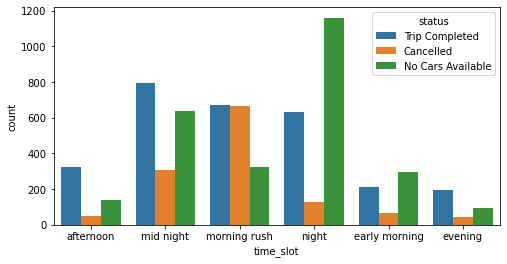

In [158]:
## check time_of_days into status and visualize it
plt.figure(figsize=(8,4))
sns.countplot(data=inp, x='time_slot', hue='status')

 - Morning Rush high peak most cab drivers cancelled the request 
 - Night Rush high peak no cars available

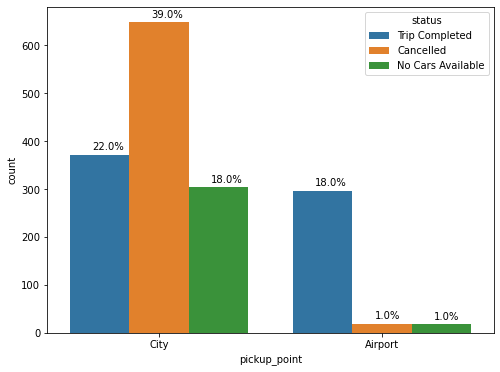

In [159]:
## take time_slot as morning_rush check with the pickup_point and status
morning_rush = inp[inp['time_slot']=='morning rush']

fig,ax = plt.subplots(figsize=(8,6))
total = len(morning_rush)
ax = sns.countplot(data=morning_rush, x='pickup_point', hue='status')
for p in ax.patches:
    percentage = "{:.1f}%".format(round(100*(p.get_height()/total)),2)
    x = p.get_x()+0.1
    y = p.get_height()+10
    ax.annotate(percentage, (x,y))
plt.show()

- Morning Rush City to Airport as been cabs are cancelled alot

In [160]:
## check the how many request are cancelled in the morning rush from city 
cancel_morning_rush_city = morning_rush.loc[(morning_rush['pickup_point']=='City') & (morning_rush['status']=='Cancelled')]
len(cancel_morning_rush_city)

648

In [161]:
## check the how many Trip_completed in the morning rush from city 
trip_completed_morning_rush_city = morning_rush.loc[(morning_rush['pickup_point']=='City') & (morning_rush['status']=='Trip Completed')]
len(trip_completed_morning_rush_city)

372

In [162]:
## check no cars available in the morning rush from city 
no_car_morning_rush_city = morning_rush.loc[(morning_rush['pickup_point']=='City')&(morning_rush['status']=='No Cars Available')]
len(no_car_morning_rush_city)

304

In [163]:
## total demand for morning rush from the city
total_demand_morning_rush_city = morning_rush.loc[(morning_rush['pickup_point']=='City')]
len(total_demand_morning_rush_city)

1324

In [164]:
## check the how many request are cancelled in the morning rush from airport
cancel_morning_rush_airport = morning_rush.loc[(morning_rush['pickup_point']=='Airport')&(morning_rush['status']=='Cancelled')]
len(cancel_morning_rush_airport)

19

In [165]:
## check the how many Trip_completed in the morning rush from airport 
trip_complete_morning_rush_airport = morning_rush.loc[(morning_rush['pickup_point']=='Airport') & (morning_rush['status']=='Trip Completed')]
len(trip_complete_morning_rush_airport)

297

In [166]:
## check no cars available in the morning rush from airport
no_car_morning_rush_airport = morning_rush.loc[(morning_rush['pickup_point']=='Airport')&(morning_rush['status']=='No Cars Available')]
len(no_car_morning_rush_airport)

18

In [167]:
## total demand for morning rush from the airport
total_demand_morning_rush_airport = morning_rush.loc[(morning_rush['pickup_point']=='Airport')]
len(total_demand_morning_rush_airport)

334

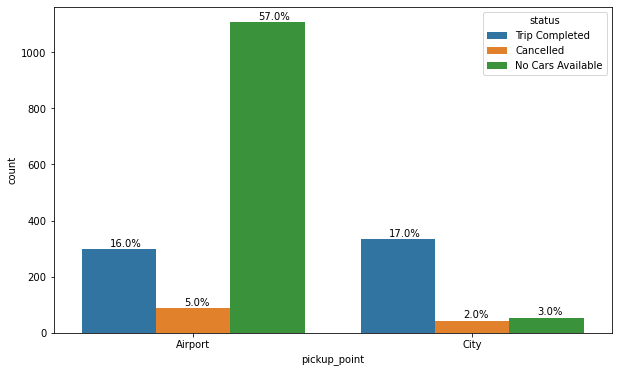

In [168]:
## check percentage in the night rush from pickup_point and status
night_rush = inp[inp['time_slot']=='night']

fig,ax = plt.subplots(figsize=(10,6))
total = len(night_rush)
sns.countplot(data=night_rush, x='pickup_point', hue='status')
for p in ax.patches:
    percentage = "{:.1f}%".format(round(100*(p.get_height()/total)),2)
    x = p.get_x()+0.1
    y = p.get_height()+10
    ax.annotate(percentage, (x,y))
plt.show()

- we can see that no cars available from airport to city

In [169]:
## total no cars available from airport in the night rush
no_car_airport = night_rush.loc[(night_rush['pickup_point']=='Airport')&(night_rush['status']=='No Cars Available')]
len(no_car_airport)

1106

In [170]:
## total trip_completed from airport in the night_rush
trip_complete_airport = night_rush.loc[(night_rush['pickup_point']=='Airport') & (night_rush['status']=='Trip Completed')]
len(trip_complete_airport)

299

In [171]:
## total cancel request from airport in night rush
cancel_night_rush_airport = night_rush.loc[(night_rush['pickup_point']=='Airport')&(night_rush['status']=='Cancelled')]
len(cancel_night_rush_airport)

87

In [172]:
## total demand supply in the airport in night rush
total_demand_night_rush_airport = night_rush.loc[(night_rush['pickup_point']=='Airport')]
len(total_demand_night_rush_airport)

1492

In [173]:
## check the total no cars are available from city in night rush
no_car_city = night_rush.loc[(night_rush['pickup_point']=='City')&(night_rush['status']=='No Cars Available')]
len(no_car_city)

54

In [174]:
## check the total trips are completed from city in night rush
trip_complete_city = night_rush.loc[(night_rush['pickup_point']=='City')&(night_rush['status']=='Trip Completed')]
len(trip_complete_city)

334

In [175]:
## check the total cancel request from city in night_rush
cancel_night_rush_city = night_rush.loc[(night_rush['pickup_point']=='City')&(night_rush['status']=='Cancelled')]
len(cancel_night_rush_city)

44

In [176]:
## total demand of city in night rush 
total_demand_night_rush_city = night_rush.loc[(night_rush['pickup_point']=='City')]
len(total_demand_night_rush_city)

432

In [177]:
def piechart(dataframe):
    labels = dataframe.index.values
    size = dataframe['status'].values
    fig,ax = plt.subplots()
    ax.pie(size, labels=labels, autopct='%1.1f%%',startangle=90)
    ax.axis('equal')
    plt.show()

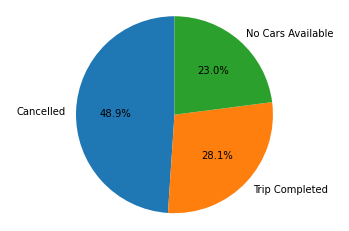

In [178]:
df_city = inp.loc[(inp['pickup_point']=='City')&(inp['time_slot']=='morning rush')]
df = pd.DataFrame(df_city['status'].value_counts())
piechart(df)

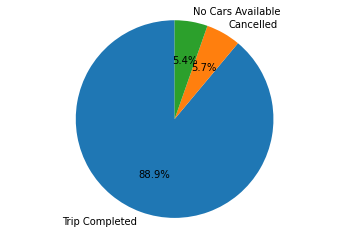

In [179]:
df_airport = inp.loc[(inp['pickup_point']=='Airport')&(inp['time_slot']=='morning rush')]
df = pd.DataFrame(df_airport['status'].value_counts())
piechart(df)

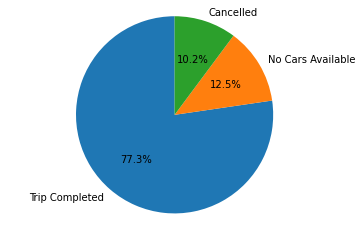

In [180]:
df_city = inp.loc[(inp['pickup_point']=='City')&(inp['time_slot']=='night')]
df = pd.DataFrame(df_city['status'].value_counts())
piechart(df)

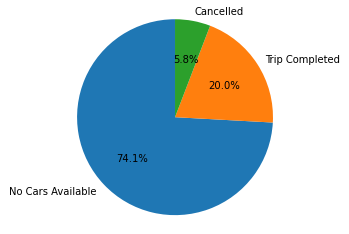

In [181]:
df_airport = inp.loc[(inp['pickup_point']=='Airport')&(inp['time_slot']=='night')]
df = pd.DataFrame(df_airport['status'].value_counts())
piechart(df)

**Observation so far:**
- The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:

     - Status: **"No Cars Available"** in Night Rush between 5 to 10 PM from Airport to City
     - Status: **"Cancelled Trip"** in Morning Rush between 5 to 10 AM from City to Airport
--------
- The above points are in sync with highest request rates coming from morning and Night slot.
   1. Morning hours :There is no high demand for cabs from airport to city 
   2. Night hours: There is no high demand for cabs from city to airport
-------
- **This tells us that there are more outbound flights in the morning and inbound flights in the Night.**
- **The reason for the issue:**
    1. **In the morning hours:**
        - Though there is high demand for cabs from city to airport, the vice versa is not true.
        - Hence the driver tends to 'cancel' the request as getting a return trip from airport to city would be tough.

    2. **In the Night hours:**
        - Though there is high demand for cabs from airport to city, the vice versa is not true.
        - Hence 'no cars available' in the airport is the hightest in the evening.
----------
- **Possible suggestions to fill the supply demand gap:**
    - Provide incentives for airport trips during peak time.
    - Assigning few extra cabs specially to the airport trips.
    - Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
    - Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
    - Promote continuous trip to airport with incentives.
    - Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help   them plan their work and they can accept the request as per their work plan.